<a href="https://colab.research.google.com/github/Kiichiro-T/python/blob/main/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt

## 1. 自己相関関数

In [ ]:
# 自己共分散関数
def autocovariance(data, k):
  T = len(data)
  mean = np.mean(data)
  S = 0
  for t in range(T-k):
    S += (data[t] - mean) * (data[t+k] - mean)
  return S / T

# 自己相関関数
def autocorrelation(data, k):
  return autocovariance(data, k) / autocovariance(data, 0)

# コレログラムのプロット
def plot_correlogram(data):
  T = len(data)
  ac_data = []
  for k in range(T):
    ac_data.append(autocorrelation(data, k))
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.stem(np.arange(T), ac_data, use_line_collection=True)

In [ ]:
data = np.tile(np.arange(1,11), 3)
data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<StemContainer object of 3 artists>

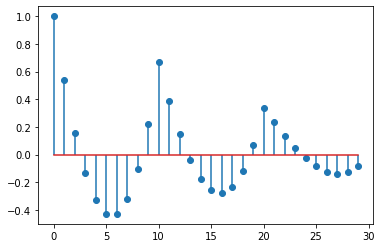

In [ ]:
ac_data = []
for k in range(len(data)):
  ac_data.append(autocorrelation(data, k))
fig = plt.figure()
plt.stem(np.arange(30), ac_data, use_line_collection=True)

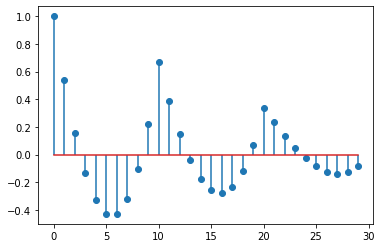

In [ ]:
plot_correlogram(data)

## 2. AR(1)モデル

T=100の場合のデータ


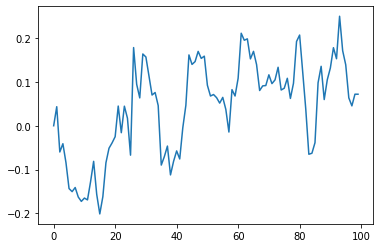

T=10
ラグ0の自己共分散関数　理論値： 0.0132, 実測値： 0.0096
ラグ5の自己相関関数　理論値： 0.5905, 実測値： -0.2939
T=100
ラグ0の自己共分散関数　理論値： 0.0132, 実測値： 0.0117
ラグ5の自己相関関数　理論値： 0.5905, 実測値： 0.4353
T=500
ラグ0の自己共分散関数　理論値： 0.0132, 実測値： 0.0091
ラグ5の自己相関関数　理論値： 0.5905, 実測値： 0.5179
T=1000
ラグ0の自己共分散関数　理論値： 0.0132, 実測値： 0.0154
ラグ5の自己相関関数　理論値： 0.5905, 実測値： 0.6296
T=5000
ラグ0の自己共分散関数　理論値： 0.0132, 実測値： 0.0125
ラグ5の自己相関関数　理論値： 0.5905, 実測値： 0.5773
データ数が増えると精度が良くなる。
Φ=-0.9, T=100の場合のデータ


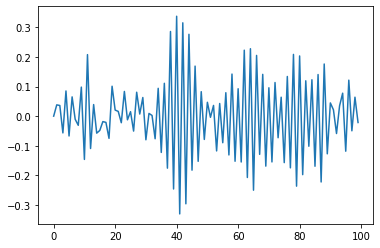

In [ ]:
# 期待値が0のAR(1)モデル
phi1 = 0.9
def ar1(phi1, T):
  ar1_data = np.zeros(T)
  for t in range(1, T):
    ar1_data[t] = phi1 * ar1_data[t-1] + np.random.normal(0,0.05)
  return ar1_data

ar1_data1 = ar1(phi1, 10)
ar1_data2 = ar1(phi1, 100)
ar1_data3 = ar1(phi1, 500)
ar1_data4 = ar1(phi1, 1000)
ar1_data5 = ar1(phi1, 5000)

print('T=100の場合のデータ')
plt.plot(ar1_data2)
plt.show()
a = 0.05 ** 2 / (1 - phi1 ** 2)
b = 0.9 ** 5
print('T=10')
print('ラグ0の自己共分散関数　理論値： {:.4f}, 実測値： {:.4f}'.format(a, autocovariance(ar1_data1, 0)))
print('ラグ5の自己相関関数　理論値： {:.4f}, 実測値： {:.4f}'.format(b, autocorrelation(ar1_data1, 5)))

print('T=100')
print('ラグ0の自己共分散関数　理論値： {:.4f}, 実測値： {:.4f}'.format(a, autocovariance(ar1_data2, 0)))
print('ラグ5の自己相関関数　理論値： {:.4f}, 実測値： {:.4f}'.format(b, autocorrelation(ar1_data2, 5)))

print('T=500')
print('ラグ0の自己共分散関数　理論値： {:.4f}, 実測値： {:.4f}'.format(a, autocovariance(ar1_data3, 0)))
print('ラグ5の自己相関関数　理論値： {:.4f}, 実測値： {:.4f}'.format(b, autocorrelation(ar1_data3, 5)))

print('T=1000')
print('ラグ0の自己共分散関数　理論値： {:.4f}, 実測値： {:.4f}'.format(a, autocovariance(ar1_data4, 0)))
print('ラグ5の自己相関関数　理論値： {:.4f}, 実測値： {:.4f}'.format(b, autocorrelation(ar1_data4, 5)))

print('T=5000')
print('ラグ0の自己共分散関数　理論値： {:.4f}, 実測値： {:.4f}'.format(a, autocovariance(ar1_data5, 0)))
print('ラグ5の自己相関関数　理論値： {:.4f}, 実測値： {:.4f}'.format(b, autocorrelation(ar1_data5, 5)))

print('データ数が増えると精度が良くなる。')

# phi1 = -0.9のとき
ar1_data6 = ar1(-0.9, 100)
print('Φ=-0.9, T=100の場合のデータ（2期の周期）')
plt.plot(ar1_data6)
plt.show()

## 3. AR(2)モデル

In [ ]:
# 期待値が0のAR(2)モデル
def ar2(phi1, phi2, T):
  ar2_data = np.zeros(T)
  ar2_data[1] = phi1 * ar2_data[0] + phi2 * 0 + np.random.normal(0,1)
  for t in range(2, T):
    ar2_data[t] = phi1 * ar2_data[t-1] + phi2 * ar2_data[t-2] + np.random.normal(0,0.05)
  return ar2_data

def solve_inverse_yule_walker_equation(data):
  rho1 = autocorrelation(data, 1)
  rho2 = autocorrelation(data, 2)
  rho_vec = np.array([rho1, rho2])
  A = np.array([[1, rho1], [rho1, 1]])
  phi = np.linalg.solve(A, rho_vec)
  print('(Φ1, Φ2) =', phi)

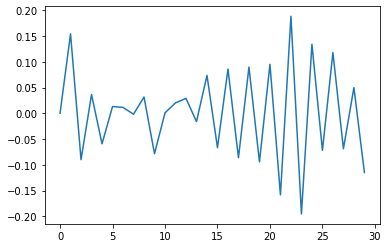

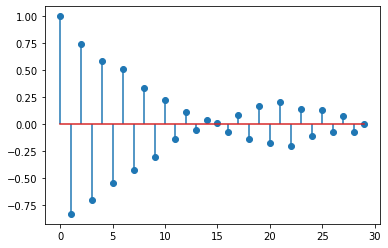

(Φ1, Φ2) = [-0.70736815  0.15044136]


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ar2_data1 = ar2(-0.7, 0.2 ,30)
ax1.plot(ar2_data1)
plot_correlogram(ar2_data1)
plt.show()
solve_inverse_yule_walker_equation(ar2_data1)

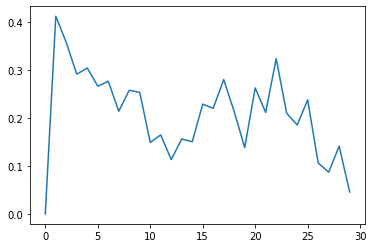

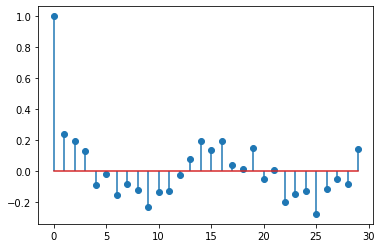

(Φ1, Φ2) = [0.20163924 0.15052055]


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ar2_data2 = ar2(0.7, 0.2 ,30)
ax1.plot(ar2_data2)
plot_correlogram(ar2_data2)
plt.show()
solve_inverse_yule_walker_equation(ar2_data2)

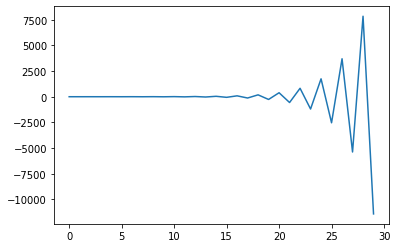

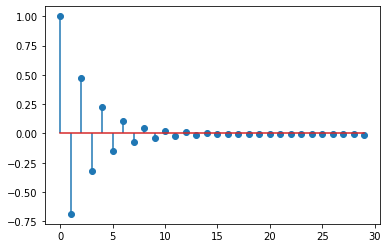

(Φ1, Φ2) = [-0.68782806 -0.00133185]


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ar2_data3 = ar2(-0.9, 0.81 ,30)
ax1.plot(ar2_data3)
plot_correlogram(ar2_data3)
plt.show()
solve_inverse_yule_walker_equation(ar2_data3)

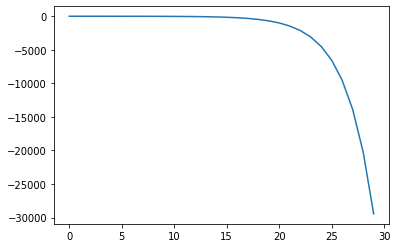

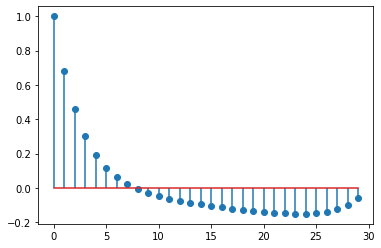

(Φ1, Φ2) = [ 0.68524366 -0.00857724]


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ar2_data4 = ar2(0.9, 0.81 ,30)
ax1.plot(ar2_data4)
plot_correlogram(ar2_data4)
plt.show()
solve_inverse_yule_walker_equation(ar2_data4)

## 3. MA(1)モデル

In [ ]:
## MA(1)モデル
from scipy.linalg import toeplitz
import copy

theta = 0.5
rho = - theta / (1 + theta**2)
rho_vec = np.array([rho, 0, 0, 0, 0])
# テプリッツ行列(k=5)
T = sp.linalg.toeplitz([1, rho, 0, 0, 0])
Rk = copy.deepcopy(T)
print('Rk')
print(Rk)
T[:,4] = rho_vec
Qk = copy.deepcopy(T)
print('Qk')
print(Qk)

# 偏自己相関係数1
phi_kk_1 = np.linalg.det(Qk) / np.linalg.det(Rk)
print(phi_kk_1)

# 偏自己相関係数2
phi_kk_2 = - theta**5 / (1 + theta**2+ theta**4+ theta**6+ theta**8+ theta**10)
print(phi_kk_2)

Rk
[[ 1.  -0.4  0.   0.   0. ]
 [-0.4  1.  -0.4  0.   0. ]
 [ 0.  -0.4  1.  -0.4  0. ]
 [ 0.   0.  -0.4  1.  -0.4]
 [ 0.   0.   0.  -0.4  1. ]]
Qk
[[ 1.  -0.4  0.   0.  -0.4]
 [-0.4  1.  -0.4  0.   0. ]
 [ 0.  -0.4  1.  -0.4  0. ]
 [ 0.   0.  -0.4  1.   0. ]
 [ 0.   0.   0.  -0.4  0. ]]
-0.02344322344322344
-0.023443223443223443


## 4. ARMA(p,q)モデル

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 参考：　https://analytics-note.xyz/time-series/statsmodels-arma/
# ARMA(1,1)
T = 200
phi_0 = 50
phi_1 =  0.8
theta_1 = 0.4
sigma = 2
mu = phi_0 / (1 - phi_1)
epsilons = np.random.normal(0, sigma, size=T)

arma_data = np.zeros(T)
arma_data[0] = mu + epsilons[0]

for t in range(1, T):
  arma_data[t] = phi_0 + phi_1 * arma_data[t-1]+epsilons[t] + theta_1 * epsilons[t-1]

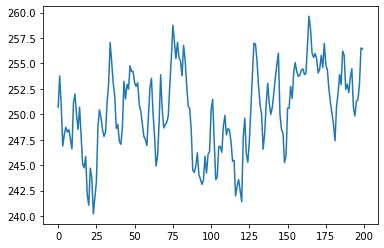

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(arma_data)
plt.show()

In [ ]:
print(sm.tsa.arma_order_select_ic(arma_data, max_ar=2, max_ma=2, ic='aic'))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{'aic':              0           1            2
0  1138.547861  973.502109  1128.360306
1   862.811338  851.301035   853.299824
2   853.429829  853.300375   853.811386, 'aic_min_order': (1, 1)}


In [ ]:
arma_model = sm.tsa.ARMA(arma_data, order=(1,1))
result = arma_model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(1, 1)   Log Likelihood                -421.651
Method:                       css-mle   S.D. of innovations              1.985
Date:                Mon, 04 Jan 2021   AIC                            851.301
Time:                        07:02:47   BIC                            864.494
Sample:                             0   HQIC                           856.640
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.4714      0.881    284.156      0.000     248.744     252.199
ar.L1.y        0.7962      0.048     16.679      0.000       0.703       0.890
ma.L1.y        0.3053      0.074      4.135      0.0

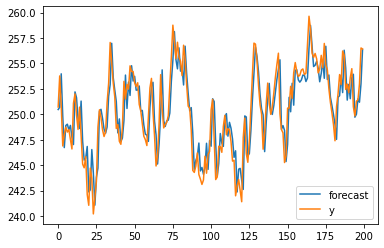

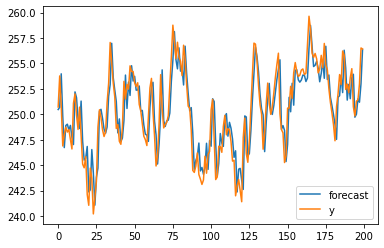

In [ ]:
result.plot_predict()

In [ ]:
# ARMA(2,1)
T = 200
phi_0 = 10
phi_1 = 0.1
phi_2 = 0.4
theta_1 = 0.1
sigma = 1
mu = phi_0 / (1 - phi_1 - phi_2)
epsilons = np.random.normal(0, sigma, size=T)

arma_data_21 = np.zeros(T)
arma_data_21[0] = mu + epsilons[0]
arma_data_21[1] = mu + epsilons[0]

for t in range(1, T):
  arma_data_21[t] = phi_0 + phi_1 * arma_data_21[t-1] + phi_2 * arma_data_21[t-2] + epsilons[t] + theta_1 * epsilons[t-1]

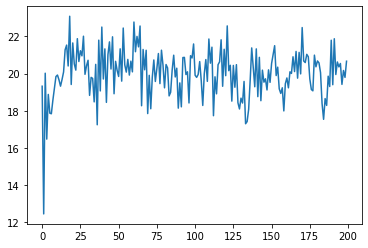

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(arma_data_21)
plt.show()

In [ ]:
print(sm.tsa.arma_order_select_ic(arma_data, max_ar=3, max_ma=3, ic='aic'))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'aic':              0           1            2            3
0  1138.547861  973.502109  1128.360306  1342.717463
1   862.811338  851.301035   853.299824   853.057337
2   853.429829  853.300375   853.811386   868.539079
3   852.421172  854.418906   853.751392   855.873336, 'aic_min_order': (1, 1)}


In [ ]:
arma_model_11 = sm.tsa.ARMA(arma_data_21, order=(1,1))
result_11 = arma_model_11.fit()
print(result_11.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(1, 1)   Log Likelihood                -325.692
Method:                       css-mle   S.D. of innovations              1.232
Date:                Mon, 04 Jan 2021   AIC                            659.385
Time:                        07:14:50   BIC                            672.578
Sample:                             0   HQIC                           664.724
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9648      0.199    100.145      0.000      19.574      20.356
ar.L1.y        0.8556      0.073     11.665      0.000       0.712       0.999
ma.L1.y       -0.6669      0.090     -7.386      0.0

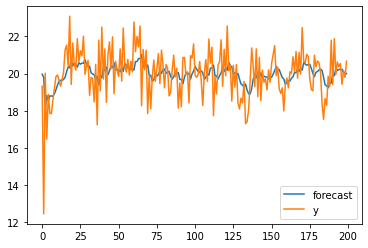

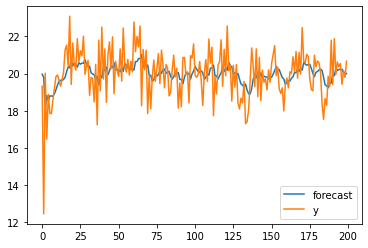

In [ ]:
result_11.plot_predict()

In [ ]:
arma_model_21 = sm.tsa.ARMA(arma_data_21, order=(2,1))
result_21 = arma_model_21.fit()
print(result_21.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(2, 1)   Log Likelihood                -306.661
Method:                       css-mle   S.D. of innovations              1.119
Date:                Mon, 04 Jan 2021   AIC                            623.322
Time:                        07:15:28   BIC                            639.814
Sample:                             0   HQIC                           629.996
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9661      0.183    109.222      0.000      19.608      20.324
ar.L1.y       -0.0379      0.112     -0.338      0.735      -0.257       0.181
ar.L2.y        0.5490      0.067      8.236      0.0

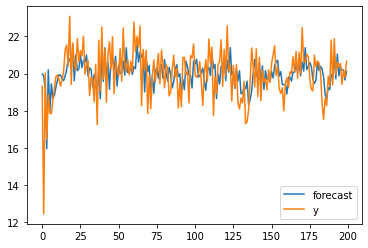

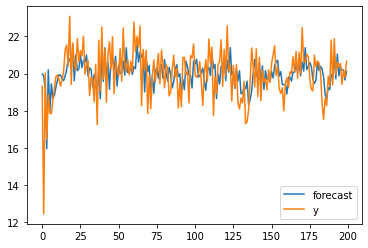

In [ ]:
result_21.plot_predict()